In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pims

from scipy.ndimage import gaussian_filter


datapath = r'C:\Itamar\Soft matter\Active solids\2022-12-26 helping anne bernheim\Shachar data\Itamar\T35'

imseq =pims.ImageSequence(datapath+r'\*.tif')

In [3]:
import numpy as np
DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
movie = 'Control'
#movie = '130721'
#movie ='140721'
#movie ='150721'
#movie ='100621'
MOVIE_PATH = DATA_PATH +  movie + '/'
GRAPH_PATH = 'C:/Users/amityu/Gel_Sheet_Graph/'

In [4]:
t =10
imseq  = np.load(MOVIE_PATH + 'np/gel_norm.npy')[t]


In [5]:
np.array(imseq[10]).shape

(512, 512)

In [6]:
im = imseq[0]
imsz = im.shape
im_stack = np.zeros(imsz +(len(imseq),))

for i in range(len(imseq)):
    im_stack[:,:,i] = imseq[i]
print(im_stack.shape)

(512, 512, 186)


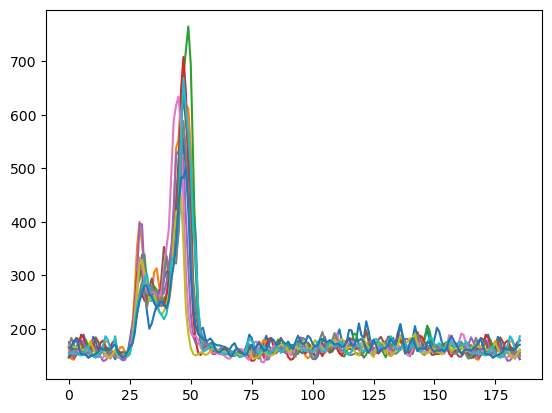

In [7]:
plt.figure()
for i  in range(0,512,50):
    plt.plot(im_stack[256,i,:])

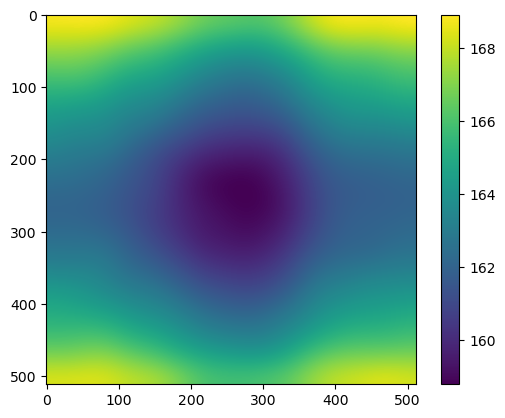

In [11]:
bg_below_plate = gaussian_filter(np.mean(im_stack[:,:,0:15],axis = 2),25)
plt.imshow(bg_below_plate); plt.colorbar()

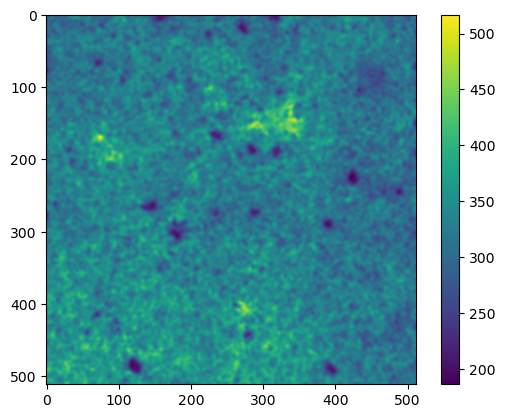

In [9]:
bg30 = gaussian_filter(np.mean(im_stack[:, :, 30:31], axis=2), 2)
plt.imshow(bg30);
plt.colorbar()

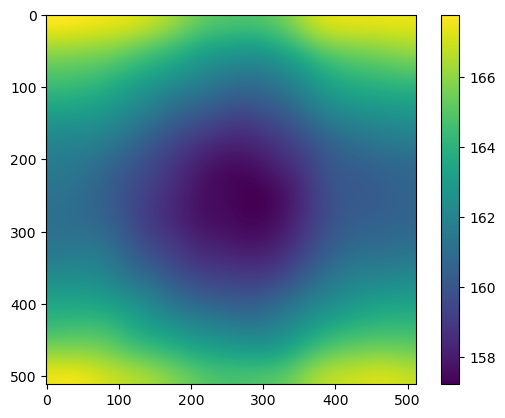

In [10]:
bg_above_tp = gaussian_filter(np.mean(im_stack[:,:,175:],axis = 2),25)
plt.imshow(bg_above_tp); plt.colorbar()

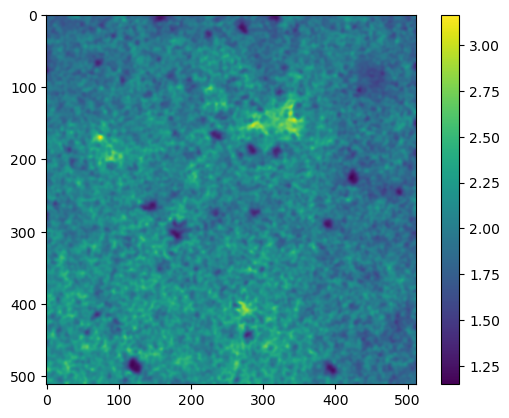

In [13]:
plt.imshow(bg30/bg_below_plate); plt.colorbar()

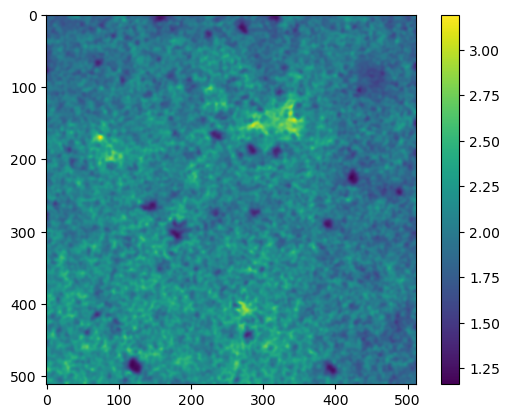

In [17]:
plt.imshow(bg30/bg_above_tp); plt.colorbar()

In [47]:
imstack_bg = np.zeros(im_stack.shape)
for i in range(len(imseq)):
    imstack_bg[:,:,i] = gaussian_filter(im_stack[:,:,i],2)/bg

(0.9, 1.2)

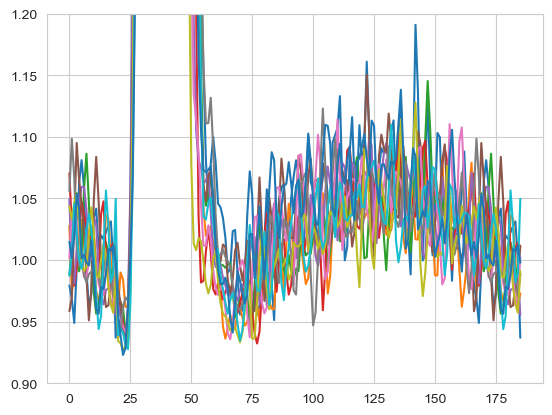

In [48]:
plt.figure()
for i  in range(0,512,50):
    plt.plot(imstack_bg[256,i,:])
plt.ylim([0.9,1.2])

In [39]:
h = np.zeros(im.shape)
for i in range(h.shape[0]):
    for j in range(h.shape[1]):
        h[i,j] = np.where(imstack_bg[i,j,:]>1.15)[0][-1]

In [35]:
h

array([[183., 183., 183., ..., 168., 178., 178.],
       [183., 183., 183., ..., 163., 178., 178.],
       [183., 183., 170., ..., 163., 178., 178.],
       ...,
       [180., 180., 180., ..., 177., 177., 183.],
       [183., 180., 180., ..., 177., 183., 183.],
       [183., 180., 180., ..., 177., 184., 184.]])

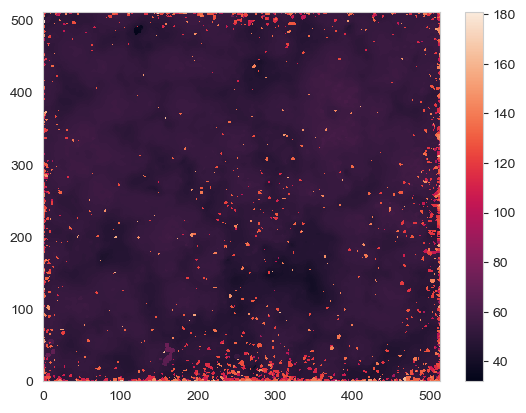

In [40]:
plt.pcolormesh(h);plt.colorbar()


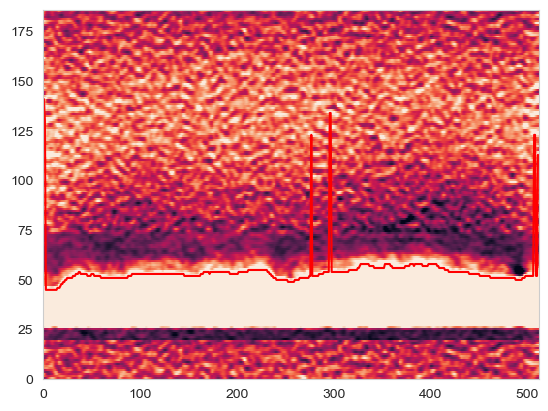

In [41]:
plt.pcolormesh(np.transpose(imstack_bg[:,400,:]));plt.plot(h[:,400],'r')
#plt.xlim([150,200])
plt.clim([0.9,1.1])